In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


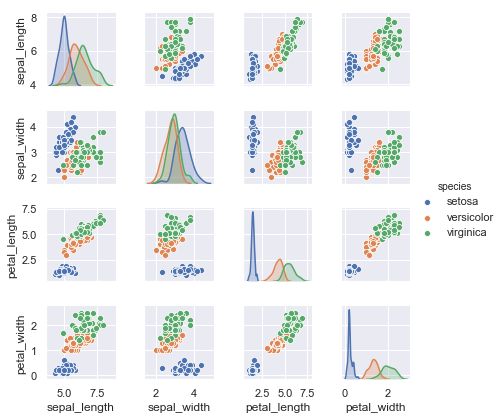

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [3]:
# Features
X_iris=iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
# Target
y_iris=iris['species']
y_iris.shape

(150,)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

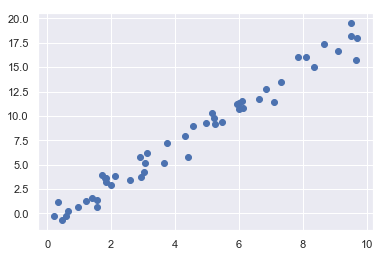

In [7]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [10]:
# Choose a class of model
from sklearn.linear_model import LinearRegression

In [11]:
# Choose model hyperparameteres
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Arrange data into a features matrix and target vector
X = x[:, np.newaxis]
X.shape

(50, 1)

In [13]:
# Fit the model to your data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.9033107255311164

In [16]:
# Predict labels for unknown data
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis] #coerce into n features matrix

In [17]:
yfit = model.predict(Xfit)

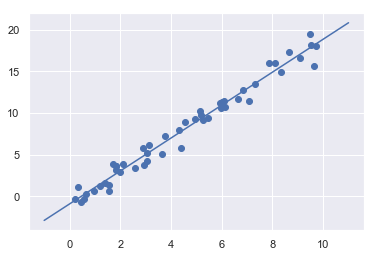

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [19]:
# Supervised learning example: Iris classification
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [20]:
from sklearn.naive_bayes import GaussianNB # 1. Choose model class
model = GaussianNB()                       # 2. Instantiate model
model.fit(Xtrain, ytrain)                  # 3. Fit model to data
y_model = model.predict(Xtest)              # 4. Predict on new data

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [22]:
### Unsupervised learning example: Iris dimensionality
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

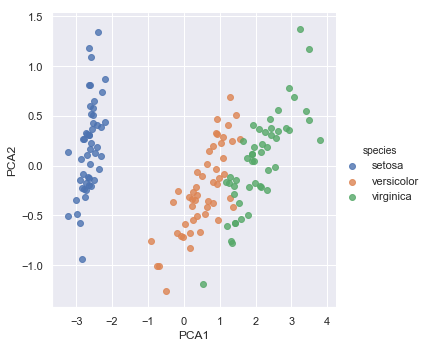

In [23]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue = 'species', data = iris, fit_reg=False)

In [25]:
### Unsupervised learning: Iris Clustering
from sklearn.mixture import GaussianMixture #Gaussian Mixture Models
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

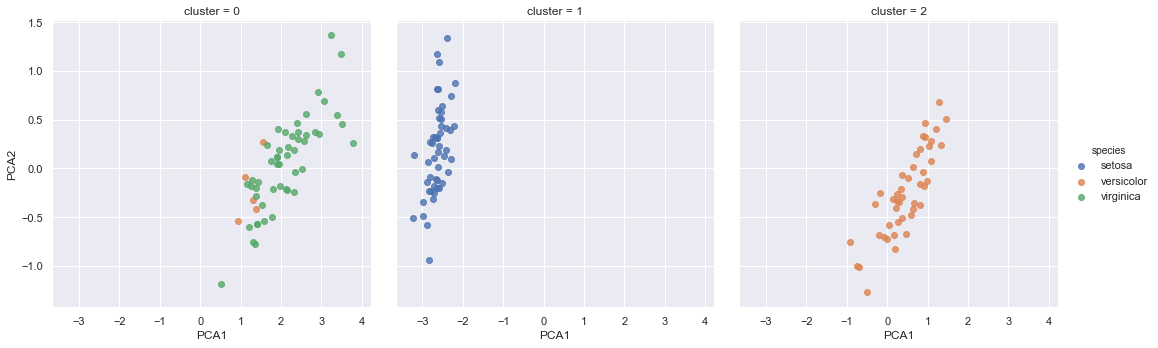

In [27]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', col = 'cluster', fit_reg = False)

In [1]:
### Application: Exploring Handwritten Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

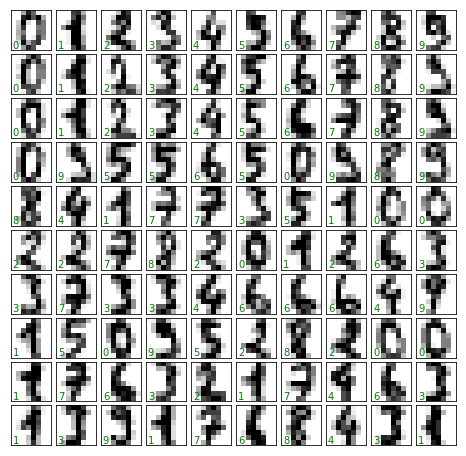

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
                           transform=ax.transAxes, color='green')

In [23]:
X = digits.data
X.shape

(1797, 64)

In [5]:
y = digits.target
y.shape

(1797,)

In [6]:
### Unsupervised learning: Dimensionality reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

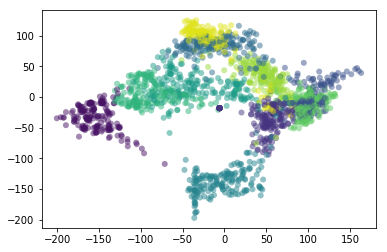

In [19]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], 
            c=digits.target,
           edgecolor='none',
            alpha=0.5)
plt.clim(-0.5, 9.5)

In [24]:
### Classification on dig
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(91.68, 0.5, 'true value')

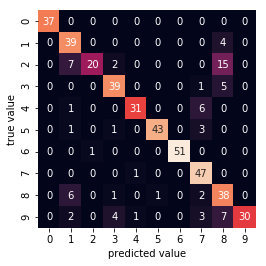

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

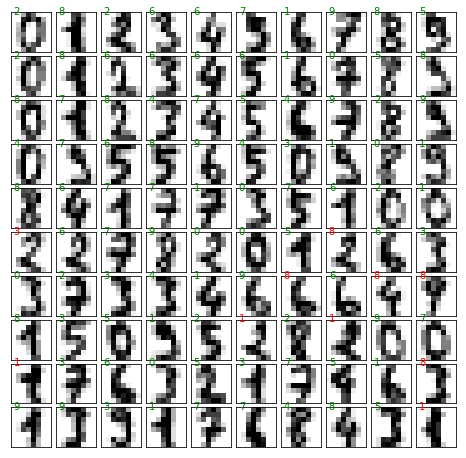

In [46]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           color='green' if(ytest[i]==y_model[i]) else 'red')
    
    

In [47]:
#### Hyperparameters and Model Validation

## Model validation the wrong way

from sklearn.datasets import load_iris
iris = load_iris()

In [48]:
X = iris.data
y = iris.target

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model = model.predict(X)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [54]:
## Model validation the right way: Holdout sets
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [55]:
## Model validation via cross-validation

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [63]:
# leave on out cross validation
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [64]:
scores.mean()

0.96

In [ ]:
### Selecting the best model

## The bias-varianve trade-off

In [1]:
## Validation curves in Sciki-Learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [2]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    #randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1 / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

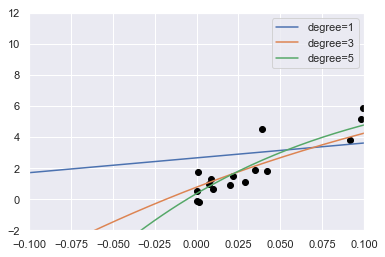

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 0.1)
plt.ylim(-2, 12)
plt.legend(loc='best')

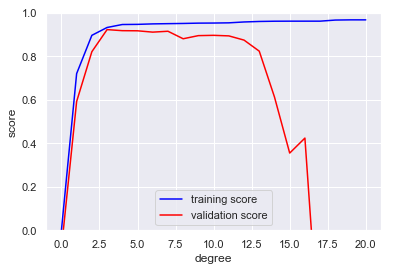

In [7]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree',
                                         degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

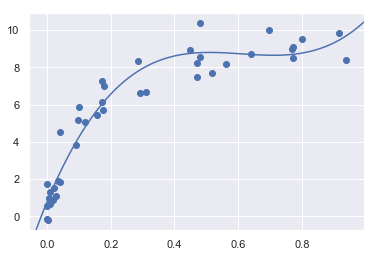

In [8]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

In [ ]:
### Learning Curves
